# Visualization

In this tutorial, we will show you how to use Zephyr class to obtain intermediate results of the pipeline for visualization purposes. To know more about pipelines and Zephyr class please refer to the modeling notebook. We also used a demo feature matrix, to know how you can create features, please refer to feature_engineering notebook.

## Load the Feature Matrix

Load the feature matrix which is the result of the `feature_engineering` notebook. For the purpose of this tutorial, we use a dummy feature matrix stored in the `data/` folder.

In [1]:
import pandas as pd

feature_matrix = pd.read_csv('data/feature_matrix.csv')

## Prepare data

Prepare the data for training by creating a `y` variable to hold the labels, imputing missing values, and normlizing the data.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pop the target labels
y = list(feature_matrix.pop('label'))
X = feature_matrix.values

# impute missing values
imputer = SimpleImputer()
X = imputer.fit_transform(X)

# normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Select Model

Select a model that has a `visual` block such as the `xgb_classifier` pipeline.

The visual block in the pipeline json defines what are the intermediate results you want to capture and return during the fitting process. For example, in the `xgb` pipeline, we are interested to see what is the best threshold it found. In addition, we are interested to see the different scores obtained at each threshold.
Then the block would look something like:

```
"visual": [
    {
        "name": "threshold",
        "variable": "zephyr_ml.primitives.postprocessing.FindThreshold#1.threshold"
    },
    {
        "name": "predictions",
        "variable": "zephyr_ml.primitives.postprocessing.FindThreshold#1.predictions"
    }
]
```

Where we have a _name_ and a _variable_ defining the intermediate outputs.

In [3]:
from zephyr_ml import Zephyr

zephyr = Zephyr('xgb_classifier')

## Visualize

When training the pipeline using the `fit` function, you can specify `zephyr.fit(.., visual=True)` to indicate you are interested in obtaining the intermediate outputs.

In [4]:
output = zephyr.fit(X, y, visual=True)

In [5]:
output.keys()

dict_keys(['threshold', 'scores'])

The output is a dictionary containing two values: `threshold`, and `scores`. Let's visualize these results.

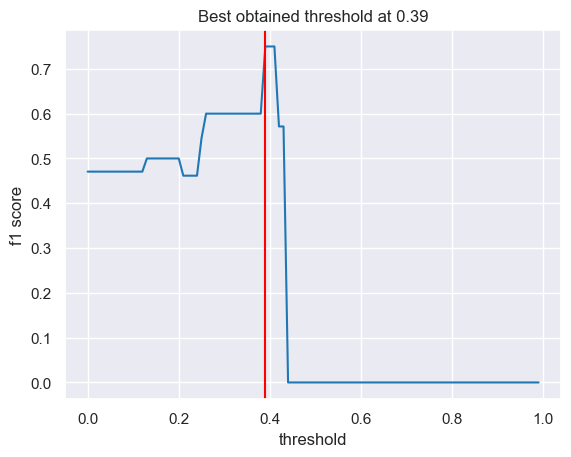

In [6]:
import matplotlib.pyplot as plt
import numpy as np

scores = output['scores']
threshold = output['threshold']

line = np.arange(0, 1.0, 0.01)

%matplotlib inline
plt.plot(line, scores)
plt.axvline(threshold, color='r')
plt.ylabel("f1 score")
plt.xlabel("threshold")
plt.title(f"Best obtained threshold at {threshold}")
plt.show()